# Importing the dependencies

In [1]:
# All import used for the Data Analytics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# All import used for the data conversion categorical--->Numerical
# Count the frequncy of the the word and matching with the other
import re  # regular expression used for the pattern matching
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer #popular method for removing common morphological and inflectional endings from English words
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# All import used fro the model traning and splitting of the Data
from sklearn.model_selection import train_test_split # to split the data into training and testing set
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\talib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Loading & EDA Process

In [4]:
# loading the dataset
df=pd.read_csv(r"C:\Users\talib\Downloads\fake_job_postings.csv")

In [5]:
# shape of the data
df.shape

(17880, 18)

In [6]:
# first 5 rows
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# data information-->Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
# Checking for the NaN values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
# Filling the NaN value
df=df.fillna('')

In [10]:
# checking again NaN value
df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [11]:
# checking unique values
df.nunique()

job_id                 17880
title                  11231
location                3106
department              1338
salary_range             875
company_profile         1710
description            14802
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
dtype: int64

In [12]:
df['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

C:\Users\talib\AppData\Local\Temp\ipykernel_15196\597021449.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='fraudulent',data=df,kind="count",palette="coolwarm")


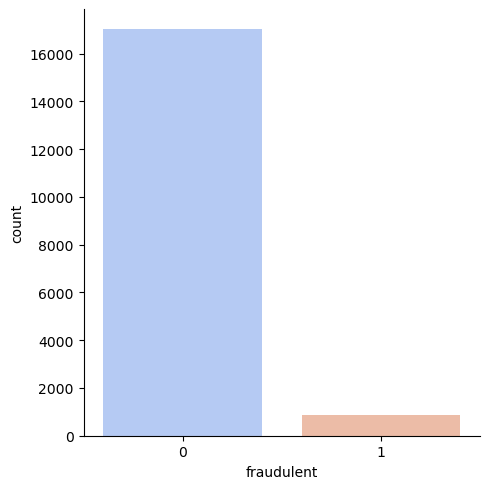

In [13]:
sns.catplot(x='fraudulent',data=df,kind="count",palette="coolwarm")

In [16]:
# Merging columns
df['content']=df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['salary_range'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_experience'] + ' ' + df['required_education']




In [17]:
df['content']

0        Marketing Intern US, NY, New York Marketing  W...
1        Customer Service - Cloud Video Production NZ, ...
2        Commissioning Machinery Assistant (CMA) US, IA...
3        Account Executive - Washington DC US, DC, Wash...
4        Bill Review Manager US, FL, Fort Worth   SpotS...
                               ...                        
17875    Account Director - Distribution  CA, ON, Toron...
17876    Payroll Accountant US, PA, Philadelphia Accoun...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer NG, LA, Lagos    Nemsia Studi...
17879    Web Application Developers NZ, N, Wellington E...
Name: content, Length: 17880, dtype: object

In [23]:
df.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,content
0,1,Marketing Intern,"US, NY, New York",Marketing,,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York Marketing W..."


In [24]:
# Seprating the data
y=df['fraudulent']

In [25]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64


In [26]:
# Stemming process
stem_port=PorterStemmer()

In [27]:
def stemming(content):
    stemming_data=re.sub('[^a-zA-Z]',' ',content)  # taking only english character
    stemming_data=stemming_data.lower() # converting into the lower case later
    stemming_data=stemming_data.split() # splitting the data into list
    stemming_data=[stem_port.stem(word) for word in stemming_data if not word in stopwords.words('english')]
    stemming_data= ' ' .join(stemming_data)
    return stemming_data

In [28]:
df['content']=df['content'].apply(stemming)
df['content']

0        market intern us ny new york market food creat...
1        custom servic cloud video product nz auckland ...
2        commiss machineri assist cma us ia wever valor...
3        account execut washington dc us dc washington ...
4        bill review manag us fl fort worth spotsourc s...
                               ...                        
17875    account director distribut ca toronto sale ven...
17876    payrol account us pa philadelphia account webl...
17877    project cost control staff engin cost control ...
17878    graphic design ng la lago nemsia studio look e...
17879    web applic develop nz n wellington engin vend ...
Name: content, Length: 17880, dtype: object

In [29]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [30]:
df['content'].value_counts()

content
contact center repres us nv la vega tidewat financ co establish initi purpos purchas servic retail instal contract two divis tidewat credit servic provid indirect consum retail financ option tidewat motor credit provid indirect consum auto financ remain commit offer partnership dealer consum creat win win win situat success reli sole success dealer consum full time posit includ follow benefit vacat hour month employ vacat hour year employ paid holiday well anniversari holiday benefitpaid person sick leav day employmentful benefit includ health dental life disabl insurancea k plan compani match month employ base upon quarterli entri dateincent bonus individu team goal certain posit bilingu spanish elig differenti pay tidewat financ compani locat henderson nv full time posit avail contact center repres provid divers lend solut dealer network promot employe integr teamwork uncompromis level custom servic posit requir follow qualif minimum year call center environmentcollect experi

In [31]:
X=df['content'].values
print(X)

['market intern us ny new york market food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb highli curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food commun crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe variou content manag systemsresearch blog websit provis food affili programassist day day affili program support screen af

In [32]:
y=df['fraudulent'].values
print(y)

[0 0 0 ... 0 0 0]


In [41]:
# Splitting the data for the tainig and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

# Converting textual data into the numeric
vectorizer=TfidfVectorizer(max_features=5000)

# to train and transform the x_train data
X_train_tfidf=vectorizer.fit_transform(X_train)

# transform test data
X_test_tfidf=vectorizer.transform(X_test)



# Logistic Regression model

In [52]:
# Model initialization
lr=LogisticRegression(class_weight='balanced' , max_iter=1000,solver='liblinear')

# Training of the model
lr.fit(X_train_tfidf,y_train)

# prediction on trainig data
# y_train_pred=lr.predict(X_train_tfidf)
# print(f'Accuracy Score for trainig data:{accuracy_score(y_train,y_train_pred):.4f}')
# print(confusion_matrix(y_train,y_train_pred))
# print(classification_report(y_train,y_train_pred))

# print("====***===="*10)

# # prediction on trainig data
# y_test_pred=lr.predict(X_test_tfidf)
# print(f'Accuracy Score for testing data:{accuracy_score(y_test,y_test_pred):.4f}')
# print(confusion_matrix(y_test,y_test_pred))
# print(classification_report(y_test,y_test_pred))

Accuracy Score for trainig data:0.9743
[[13246   365]
 [    3   690]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     13611
           1       0.65      1.00      0.79       693

    accuracy                           0.97     14304
   macro avg       0.83      0.98      0.89     14304
weighted avg       0.98      0.97      0.98     14304

====***========***========***========***========***========***========***========***========***========***====
Accuracy Score for testing data:0.9678
[[3310   93]
 [  22  151]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.62      0.87      0.72       173

    accuracy                           0.97      3576
   macro avg       0.81      0.92      0.85      3576
weighted avg       0.98      0.97      0.97      3576



# RandomForestClassifier Model

#### Note
**RandomForestClassifier Model doesn't fit for Imbalanced Data set with TfidfVectorizer**<br>
*Reason: It cause overfitting might your accuracy could goes higher like ~1.0*<br>

*Accuracy:Generally accuracy doesn't use for Imbalanced dataset beacuase it will mislead with it's higher or lower performance*

In [53]:
# Model initialization
rfc=RandomForestClassifier(n_estimators=100,class_weight='balanced',max_depth=20,min_samples_leaf=5,n_jobs=-1,max_features='sqrt',random_state=42)
# Model training
rfc.fit(X_train_tfidf,y_train)

# prediction on trainig data
# y_train_pred=rfc.predict(X_train_tfidf)
# print(f'Accuracy Score for training data:{accuracy_score(y_train,y_train_pred):.4f}')
# print(confusion_matrix(y_train,y_train_pred))
# print(classification_report(y_train,y_train_pred))

# print("====***===="*10)

# # prediction on trainig data
# y_test_pred=rfc.predict(X_test_tfidf)
# print(f'Accuracy Score for testing data:{accuracy_score(y_test,y_test_pred):.4f}')
# print(confusion_matrix(y_test,y_test_pred))
# print(classification_report(y_test,y_test_pred))

Accuracy Score for training data:0.9838
[[13384   227]
 [    5   688]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     13611
           1       0.75      0.99      0.86       693

    accuracy                           0.98     14304
   macro avg       0.88      0.99      0.92     14304
weighted avg       0.99      0.98      0.98     14304

====***========***========***========***========***========***========***========***========***========***====
Accuracy Score for testing data:0.9687
[[3342   61]
 [  51  122]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3403
           1       0.67      0.71      0.69       173

    accuracy                           0.97      3576
   macro avg       0.83      0.84      0.83      3576
weighted avg       0.97      0.97      0.97      3576



# MultiNomial Naive Bias Model

In [57]:
# Model initailization
mn_nb=MultinomialNB()

# Model training
mn_nb.fit(X_train_tfidf,y_train)

# prediction of the Model and Model Evaluation on training data
# y_train_pred=mn_nb.predict(X_train_tfidf)
# print(f'Accuracy on trainig data:{accuracy_score(y_train,y_train_pred):.4f}')
# print(confusion_matrix(y_train,y_train_pred))
# print(classification_report(y_train,y_train_pred))

# print("====***===="*10)


# # prediction on trainig data
# y_test_pred=mn_nb.predict(X_test_tfidf)
# print(f'Accuracy Score for testing data:{accuracy_score(y_test,y_test_pred):.4f}')
# print(confusion_matrix(y_test,y_test_pred))
# print(classification_report(y_test,y_test_pred))

Accuracy on trainig data:0.9617
[[13584    27]
 [  521   172]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13611
           1       0.86      0.25      0.39       693

    accuracy                           0.96     14304
   macro avg       0.91      0.62      0.68     14304
weighted avg       0.96      0.96      0.95     14304

====***========***========***========***========***========***========***========***========***========***====
Accuracy Score for testing data:0.9636
[[3398    5]
 [ 125   48]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.91      0.28      0.42       173

    accuracy                           0.96      3576
   macro avg       0.94      0.64      0.70      3576
weighted avg       0.96      0.96      0.95      3576



# Linear Support Vector Claasifier

In [60]:
# Model initialization
svc=LinearSVC(class_weight='balanced')

# Model Training
svc.fit(X_train_tfidf,y_train)

# prediction of the Model and Model Evaluation on training data
# y_train_pred=svc.predict(X_train_tfidf)
# print(f'Accuracy on trainig data:{accuracy_score(y_train,y_train_pred):.4f}')
# print(confusion_matrix(y_train,y_train_pred))
# print(classification_report(y_train,y_train_pred))

# print("====***===="*10)


# # prediction on trainig data
# y_test_pred=svc.predict(X_test_tfidf)
# print(f'Accuracy Score for testing data:{accuracy_score(y_test,y_test_pred):.4f}')
# print(confusion_matrix(y_test,y_test_pred))
# print(classification_report(y_test,y_test_pred))

Accuracy on trainig data:0.9944
[[13531    80]
 [    0   693]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13611
           1       0.90      1.00      0.95       693

    accuracy                           0.99     14304
   macro avg       0.95      1.00      0.97     14304
weighted avg       0.99      0.99      0.99     14304

====***========***========***========***========***========***========***========***========***========***====
Accuracy Score for testing data:0.9849
[[3373   30]
 [  24  149]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.83      0.86      0.85       173

    accuracy                           0.98      3576
   macro avg       0.91      0.93      0.92      3576
weighted avg       0.99      0.98      0.99      3576



#### Note:All the Model's that are commented out can be used seprately also
#### for using them just uncomment and run (enter+shift)

# Function Using for all the model's

In [67]:
def evaluate_model(model,X_train_tfidf,X_test_tfidf,y_train,y_test):
    print(f'============{model} Model Evaluation on Trainig & Testing data=========')
    print('-----------Model Evaluation on Training Data-------------')
    y_train_pred=model.predict(X_train_tfidf)
    print(classification_report(y_train,y_train_pred))

    print('\n-----------Model Evaluation on Testing Data--------------')
    y_test_pred=model.predict(X_test_tfidf)
    print(classification_report(y_test,y_test_pred))

    print(f'All Test has been executed succesfully for {model} Model\n')
          
    

In [68]:
evaluate_model(lr,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model(rfc,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model(mn_nb,X_train_tfidf,X_test_tfidf,y_train,y_test)
evaluate_model(svc,X_train_tfidf,X_test_tfidf,y_train,y_test)


============LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear') Model Evaluation on Trainig & Testing data=========
-----------Model Evaluation on Training Data-------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     13611
           1       0.65      1.00      0.79       693

    accuracy                           0.97     14304
   macro avg       0.83      0.98      0.89     14304
weighted avg       0.98      0.97      0.98     14304


-----------Model Evaluation on Testing Data--------------
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.62      0.87      0.72       173

    accuracy                           0.97      3576
   macro avg       0.81      0.92      0.85      3576
weighted avg       0.98      0.97      0.97      3576

All Test has been executed succesfully for LogisticRegression(class_weight='balanced',

# pickle - to store the models

In [73]:
import pickle 

# Saving Model
pickle.dump(lr, open("lr_model.pkl", "wb"))
pickle.dump(mn_nb, open("mn_nb_model.pkl", "wb"))
pickle.dump(rfc, open("rfc_model.pkl", "wb"))
pickle.dump(svc, open("svc_model.pkl", "wb"))

# save vecotrizer
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))
